___
# Ciência dos Dados - Projeto 3: Filmes#
___

### _Gabriela Caruso e Mariana Abrantes - 2C_ ###
___

## Introdução ##

No projeto final de Ciência dos Dados foi conduzida uma análise exploratória de dados de filmes. A partir desta, foi desenvolvida uma conclusão analítica baseada na técnica de clusterização. 

Clustering ou análise de agrupamento de dados é o agrupamento automático destes segundo seu grau de semelhança, que tem como base o alogaritmo. Os tipos mais comuns do alogaritmos são os particionais e os hierárquicos.

## Objetivo ##

Nosso trabalho tem como objetivo criar uma playlist de filmes baseados no nosso dataset utilizando o método Agglomerative Clustering, para que o usuário informe algum filme e o computador crie uma playlist baseada neste. 

## Imports ##

In [79]:
%matplotlib inline
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
import seaborn as sb
import sklearn
import sklearn.metrics as sm

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams

np.random.seed(42)

## Lendo as tabelas

Para a realização do trabalho utilizamos os dados provenientes do site: https://data.world/popculture/imdb-5000-movie-dataset.

In [80]:
#----------------------------------------- PASSANDO DE CSV PARA EXCEL ---------------------------------------------------------#

#df = pd.read_csv('https://query.data.world/s/dgju3rv2knocz2ost6qyly7vwyekcv')
#writer = pd.ExcelWriter('Projeto3_CD.xlsx')
#df.to_excel(writer,'data')
#writer.save()

Este _dataset_ disponibiliza a tabela a seguir:

In [81]:
df = pd.read_excel('Projeto3_CD.xlsx')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Eliminando colunas

O dataset escolhido vinham com 28 colunas, entretanto nem todas relevantes para a finalidade do nosso projeto. 
Mantiveram-se apenas as 16 seguintes.

In [82]:
dado = df.drop(labels=None, axis=0, index=None, columns='movie_imdb_link', level=None, inplace=False, errors='raise')
dado2 = dado.drop(labels=None, axis=0, index=None, columns='aspect_ratio', level=None, inplace=False, errors='raise')
dado3 = dado2.drop(labels=None, axis=0, index=None, columns='language', level=None, inplace=False, errors='raise')
dado4 = dado3.drop(labels=None, axis=0, index=None, columns='facenumber_in_poster', level=None, inplace=False, errors='raise')
dado5 = dado4.drop(labels=None, axis=0, index=None, columns='plot_keywords', level=None, inplace=False, errors='raise')
dado6 = dado5.drop(labels=None, axis=0, index=None, columns='num_voted_users', level=None, inplace=False, errors='raise')
dado7 = dado6.drop(labels=None, axis=0, index=None, columns='num_critic_for_reviews', level=None, inplace=False, errors='raise')
dado8 = dado7.drop(labels=None, axis=0, index=None, columns='num_user_for_reviews', level=None, inplace=False, errors='raise')
dado9 = dado8.drop(labels=None, axis=0, index=None, columns='director_facebook_likes', level=None, inplace=False, errors='raise')
dado10 = dado9.drop(labels=None, axis=0, index=None, columns='actor_3_facebook_likes', level=None, inplace=False, errors='raise')
dado11 = dado10.drop(labels=None, axis=0, index=None, columns='actor_1_facebook_likes', level=None, inplace=False, errors='raise')
dado12 = dado11.drop(labels=None, axis=0, index=None, columns='actor_2_facebook_likes', level=None, inplace=False, errors='raise')
data = dado12.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = False)
dados = dado12.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = False)

In [83]:
colunas = list(data)
#print(len(colunas))
colunas

['color',
 'director_name',
 'duration',
 'actor_2_name',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'cast_total_facebook_likes',
 'actor_3_name',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'imdb_score',
 'movie_facebook_likes']

## Análise Exploratória ##

### Correlação e _Heatmap_

In [84]:
data.corr()

,duration,gross,cast_total_facebook_likes,budget,title_year,imdb_score,movie_facebook_likes
duration,1.000000,0.252930,0.123148,0.070070,-0.130492,0.366264,0.221966
gross,0.252930,1.000000,0.237917,0.101757,0.049290,0.216346,0.373275
cast_total_facebook_likes,0.123148,0.237917,1.000000,0.029852,0.122454,0.107451,0.205164
budget,0.070070,0.101757,0.029852,1.000000,0.045332,0.030136,0.054351
title_year,-0.130492,0.049290,0.122454,0.045332,1.000000,-0.135839,0.301236
imdb_score,0.366264,0.216346,0.107451,0.030136,-0.135839,1.000000,0.280577
movie_facebook_likes,0.221966,0.373275,0.205164,0.054351,0.301236,0.280577,1.000000


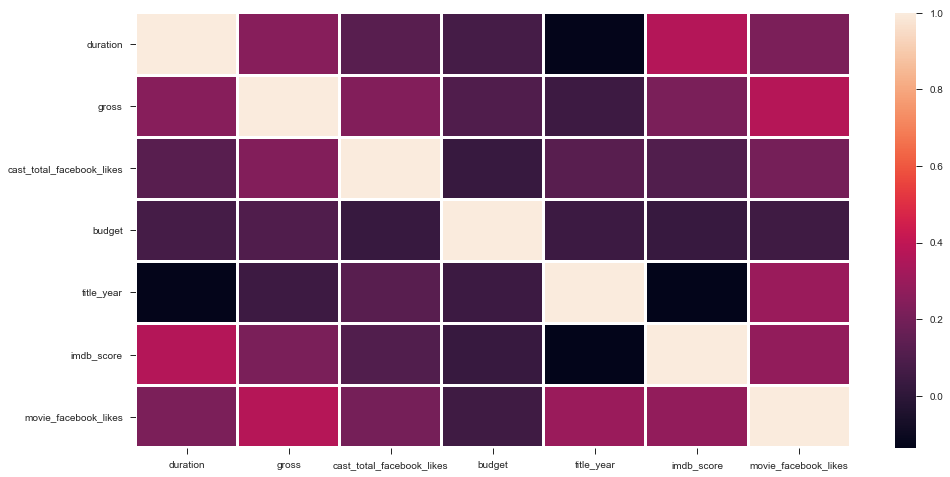

In [85]:
plt.figure(figsize=(16, 8))
sb.heatmap(data.corr(), linewidth=2);

A tabela e o gráfico nos mostram as correlaçôes entre os dados numéricos do nosso _DataFrame_. Estas apresentam valores muito baixos devido a independência dos dados em questão. Os quais serão analisados individualmente e portanto a relação não interfere no resultado do projeto.

In [86]:
#--------------------------- CRIANDO UM DATAFRAME SÓ COM OS FEATURES NUMÉRICOS ------------------------------------------------#
data2 = data[['duration', 'gross', 'cast_total_facebook_likes', 'budget', 'title_year', 'imdb_score', 'movie_facebook_likes']]
data2.head()

,duration,gross,cast_total_facebook_likes,budget,title_year,imdb_score,movie_facebook_likes
0,178.0,760505847.0,4834,237000000.0,2009.0,7.9,33000
1,169.0,309404152.0,48350,300000000.0,2007.0,7.1,0
2,148.0,200074175.0,11700,245000000.0,2015.0,6.8,85000
3,164.0,448130642.0,106759,250000000.0,2012.0,8.5,164000
5,132.0,73058679.0,1873,263700000.0,2012.0,6.6,24000


In [ ]:
sb.set(style="ticks")
sb.pairplot(data2, hue='title_year');

A matriz de dispersão acima exemplifica graficamente a baixa correlação entre os dados.

### Analisando alguns dados individualmente

In [ ]:
data.loc[:,"title_year"].plot.box()
data['title_year'].describe()

Analisando a coluna dos anos de lançamento dos filmes pelo _Boxplot_, observa-se que a maior concentração se dá na década de 2000.

In [ ]:
data.loc[:,"imdb_score"].plot.box()
data['imdb_score'].describe()

Analisando a coluna da avaliação dos filmes feita pelo Imbd pelo _Boxplot_, observa-se que a nota média é aproximadamente 6,5.

## Alterando os dados escritos por numéricos

In [ ]:
def numerar(dataframe, coluna):
    # Criando a lista de nomes únicos:
    unico = []
    for classe in dataframe[coluna]:
        if classe not in unico:
            unico.append(classe)
            
    # Criando a lista de nomes alterados para números:
    reclassificado = []        
    for item in dataframe[coluna]:
        reclassificado.append(unico.index(item))
    
    # Substituindo a coluna toda do DataFrame:
    dataframe[coluna] = reclassificado
    
    # Retornando o novo DataFrame:
    return dataframe

In [ ]:
numerar(data, "color")
numerar(data, "actor_2_name")
numerar(data, "director_name")
numerar(data, "actor_1_name")
numerar(data, "movie_title")
numerar(data, "genres")
numerar(data, "actor_3_name")
numerar(data, "country")
numerar(data, "content_rating")
data.head()

## Separando variáveis para o Clustering ##

In [ ]:
colunas

In [ ]:
X = data.ix[:, (1,3,5,6,9,13,14)].values
Y = data.ix[:, (0)].values

## Clustering ##

A função _AgglomerativeClustering_ executa um agrupamento hierárquico, que analisa de baixo para cima os clusters (se inicia em seu próprio e estes são mesclados sucessivamente). Os critérios usados na mesclagem são:

    • Ward: nimiza a soma das diferenças quadradas dentro de todos os clusters. É semelhante ao método K-means, mas possui uma abordagem hierárquica aglomerativa.
    • Complete linkage: é a distância máxima entre observações de pares de clusters.
    • Avarege linkage: minimiza a média das distâncias entre todas as observações de pares de clusters. 

In [ ]:
#----------------------------- TESTANDO AFFINITY: EUCLIDEAN E lINKAGE: WARD -------------------------------------------------#

k = 20

Hclustering = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward")

Hclustering.fit(X)

sm.accuracy_score(Y, Hclustering.labels_)

In [ ]:
#----------------------------- TESTANDO AFFINITY: EUCLIDEAN E lINKAGE: COMPLETE  ----------------------------------------------#

k = 20

Hclustering = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="complete")

Hclustering.fit(X)

sm.accuracy_score(Y, Hclustering.labels_)

In [ ]:
#----------------------------- TESTANDO AFFINITY: EUCLIDEAN E lINKAGE: AVARAGE ------------------------------------------------#

k = 20

Hclustering = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="average")

Hclustering.fit(X)

sm.accuracy_score(Y, Hclustering.labels_)

In [ ]:
#--------------------------- TESTANDO AFFINITY: MANHATTAN E lINKAGE: COMPLETE -------------------------------------------------#

k = 20

Hclustering = AgglomerativeClustering(n_clusters=k, affinity="manhattan", linkage="complete")

Hclustering.fit(X)

sm.accuracy_score(Y, Hclustering.labels_)

In [ ]:
#----------------------------- TESTANDO AFFINITY: MANHATTAN E lINKAGE: AVARAGE -----------------------------------------------#

k = 20

Hclustering = AgglomerativeClustering(n_clusters=k, affinity="manhattan", linkage="average")

Hclustering.fit(X)

sm.accuracy_score(Y, Hclustering.labels_)

In [ ]:
#----------------------------- TESTANDO AFFINITY: COSINE E lINKAGE: COMPLETE -------------------------------------------------#

k = 20

Hclustering = AgglomerativeClustering(n_clusters=k, affinity="cosine", linkage="complete")

Hclustering.fit(X)

sm.accuracy_score(Y, Hclustering.labels_)

In [ ]:
#----------------------------- TESTANDO AFFINITY: COSINE E lINKAGE: AVARAGE -------------------------------------------------#

k = 20

Hclustering = AgglomerativeClustering(n_clusters=k, affinity="cosine", linkage="average")

Hclustering.fit(X)

sm.accuracy_score(Y, Hclustering.labels_)

## Implementando melhor afinidade e _linkage_ ##

In [ ]:
k = 20

Hclustering = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="average")

Hclustering.fit(X)

c = Hclustering.labels_

pd.Series(Hclustering.labels_).value_counts()

### Exemplo de um cluster - grupo 18 ###

In [ ]:
data[c==18]

## Dendograma ##

#### Metódo utilizado: Cluster Hierárquico

O cluster hierárquico é representado como uma árvore (dendograma), na qual a raíz é o cluster exclusivo que possui todas as amostras e as folhas, os clusters com apenas algumas.
O dendograma abaixo resulta em 20 grupos. O eixo X nos dá a informação de quantos filmes estão agrupados em cada cluster. Já o eixo Y representa a distância entre os grupos.

In [ ]:
Z = linkage(X, "ward")

f = dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=4000)

plt.show()

### Adicionando uma nova coluna ao dataframe - cluster

In [ ]:
dados['cluster'] = c
dados.head()

## Encontrando a playlist de um filme ##

In [ ]:
a = dados.iloc[:1,:]
a

In [ ]:
d = a.cluster[0]
d

In [ ]:
b = dados[c==d]
b.sort_values(by="imdb_score", ascending=False).head(5)

## Conclusão

A partir do _AgglomerativeClustering_ foi possível criar 20 grupos de filmes que possuiam características similares. 